In [2]:
import random
import math
from random_variables import *
from random_tester import *
from random_combinatorics import *

## Plotting random variables
In order to verify the implementations of the random variables we visualize the distributions using histograms.

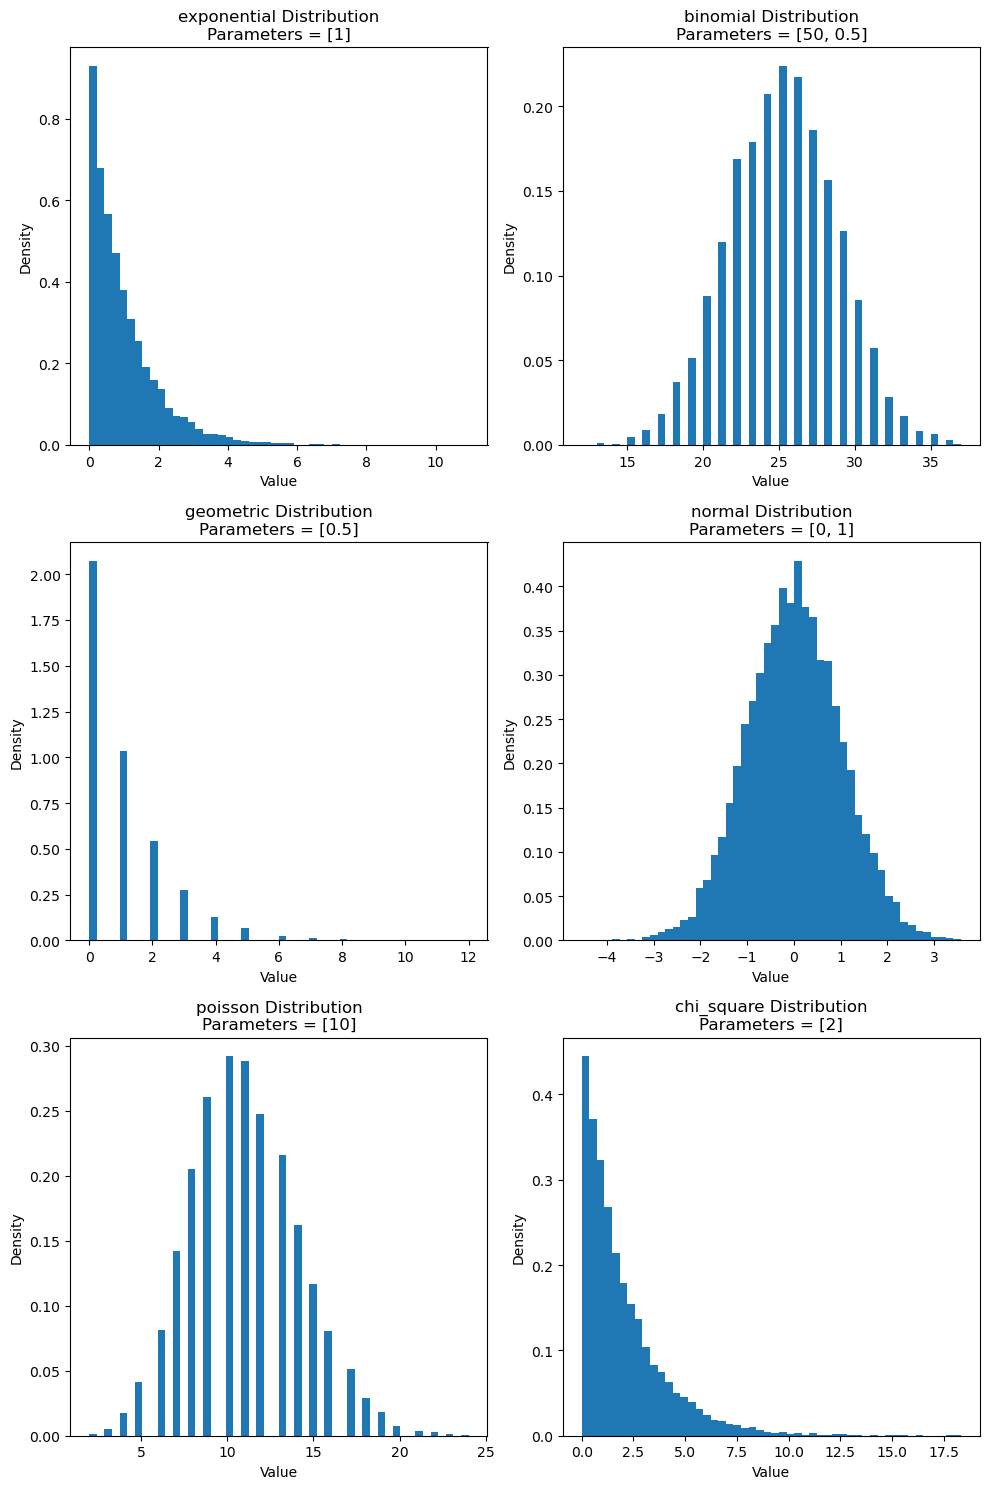

In [3]:
import matplotlib.pyplot as plt
import math

def histogram(tests: list, bins: int = 100, size: int = 10000) -> None:
    """
    Generates and displays histograms of multiple given distributions in a rectangular grid of subplots.

    Parameters:
        tests (list): A list of lists, where each sublist contains a distribution function and its corresponding parameters.
        bins (int): The number of bins in each histogram. Defaults to 100.
        size (int): The number of samples to generate from each distribution. Defaults to 10000.

    Returns:
        None
    """
    num_distributions = len(tests)
    
    # Calculate the number of rows and columns for a square grid layout
    rows = math.ceil(math.sqrt(num_distributions))
    cols = math.ceil(num_distributions / rows)
    
    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
    
    # Flatten axes array for easy iteration
    axes = axes.flatten()
    
    # Plot each distribution in its respective subplot
    for i, (distribution, dist_params) in enumerate(tests):
        values = [distribution(*dist_params) for _ in range(size)]
        
        axes[i].hist(values, bins=bins, density=True)
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Density')
        axes[i].set_title(f'{distribution.__name__} Distribution\nParameters = {dist_params}')
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Example usage
tests = [
    [exponential, [1]],
    [binomial, [50, 0.5]],
    [geometric, [0.5]],
    [normal, [0, 1]],
    [poisson, [10]],
    [chi_square, [2]]
]

histogram(tests, bins=50, size=10000)


## Geometric random variables
For the disk and the circle we plot the uniform random variables.

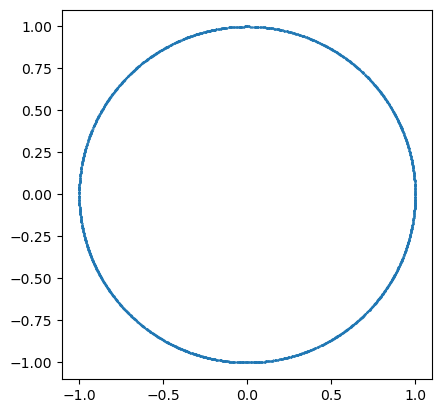

In [4]:
n= 5000
# Generate points on the circle

vals = [uniform_circle(1) for _ in range(n)]

# Plot the points
plt.scatter(*zip(*vals), s=0.1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


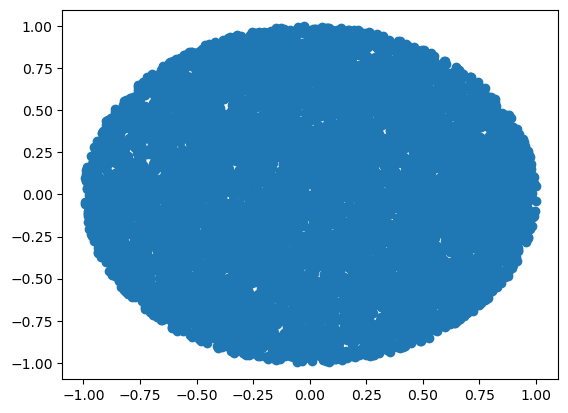

In [5]:
n = 10000
import matplotlib.pyplot as plt
vals = [ uniform_disk(1) for _ in range(n)]
plt.scatter(*zip(*vals))
plt.show()

## Random combinatorics
To ensure that the methods in `random_combinatorics.py` indeed work as intended, we implement test to verify that the output follows the correct distribution.
Most of the time we produce combinatoric objects uniformly, in which case we use
```python
 uniform_test(random_function, *args, N=10000, **kwargs)
```

In case of non-uniform distributions, for example when sampling from a set with given probabilities, use 
```python
 random_test(random_function, *args, N=10000, **kwargs)
 ```
 instead.

In [6]:
n = 4
size = 10000
uniform_test(random_permutation, n, N = size)


Random Object                  | Probability  | Discrepancy
------------------------------------------------------------
(3, 1, 2, 0)                   | 0.0411       | 0.0006    
------------------------------------------------------------
(0, 3, 2, 1)                   | 0.0402       | 0.0015    
------------------------------------------------------------
(3, 0, 2, 1)                   | 0.0392       | 0.0025    
------------------------------------------------------------
(0, 1, 3, 2)                   | 0.0416       | 0.0001    
------------------------------------------------------------
(2, 3, 1, 0)                   | 0.0448       | 0.0031    
------------------------------------------------------------
(2, 1, 3, 0)                   | 0.0398       | 0.0019    
------------------------------------------------------------
(1, 2, 0, 3)                   | 0.0431       | 0.0014    
------------------------------------------------------------
(2, 0, 1, 3)                   | 0.0430

In [7]:
n = 5
k = 2
N = 10000
uniform_test(random_subset, 5, 2, N = N)

Random Object                  | Probability  | Discrepancy
------------------------------------------------------------
(2, 3)                         | 0.0491       | 0.0009    
------------------------------------------------------------
(1, 0)                         | 0.0482       | 0.0018    
------------------------------------------------------------
(4, 3)                         | 0.0532       | 0.0032    
------------------------------------------------------------
(1, 2)                         | 0.0479       | 0.0021    
------------------------------------------------------------
(2, 4)                         | 0.0499       | 0.0001    
------------------------------------------------------------
(0, 2)                         | 0.0491       | 0.0009    
------------------------------------------------------------
(3, 1)                         | 0.0530       | 0.0030    
------------------------------------------------------------
(3, 0)                         | 0.0485

In [8]:
n = 5
k = 2
N = 10000
uniform_test(random_partition_with_parts, n, k, N = N)

Random Object                  | Probability  | Discrepancy
------------------------------------------------------------
(3, 2)                         | 0.2475       | 0.0025    
------------------------------------------------------------
(4, 1)                         | 0.2558       | 0.0058    
------------------------------------------------------------
(1, 4)                         | 0.2515       | 0.0015    
------------------------------------------------------------
(2, 3)                         | 0.2452       | 0.0048    
------------------------------------------------------------
Total Probability: 1.0000


In [9]:
sample_set = [1,2,3]
N = 1000
weights = [0.1,0.2,0.7]
random_test(sample, sample_set, N = N, weights = weights)

Random Object                  | Probability 
------------------------------------------------------------
2                              | 0.2050      
------------------------------------------------------------
3                              | 0.7090      
------------------------------------------------------------
1                              | 0.0860      
------------------------------------------------------------
Total Probability: 1.0000


In [10]:
n = 7
N = 1000000
uniform_test(random_partition, n, N=N)


Random Object                  | Probability  | Discrepancy
------------------------------------------------------------
(4, 2, 1)                      | 0.0666       | 0.0001    
------------------------------------------------------------
(3, 3, 1)                      | 0.0668       | 0.0002    
------------------------------------------------------------
(5, 1, 1)                      | 0.0667       | 0.0000    
------------------------------------------------------------
(7,)                           | 0.0665       | 0.0002    
------------------------------------------------------------
(2, 1, 1, 1, 1, 1)             | 0.0662       | 0.0005    
------------------------------------------------------------
(2, 2, 2, 1)                   | 0.0667       | 0.0000    
------------------------------------------------------------
(2, 2, 1, 1, 1)                | 0.0670       | 0.0004    
------------------------------------------------------------
(3, 1, 1, 1, 1)                | 0.0668

In [11]:
n = 5
N = 1000000
uniform_test(random_ordered_partition, n, N=N)

Random Object                  | Probability  | Discrepancy
------------------------------------------------------------
(3, 1, 1)                      | 0.0622       | 0.0003    
------------------------------------------------------------
(2, 1, 2)                      | 0.0622       | 0.0003    
------------------------------------------------------------
(1, 3, 1)                      | 0.0627       | 0.0002    
------------------------------------------------------------
(1, 1, 2, 1)                   | 0.0625       | 0.0000    
------------------------------------------------------------
(4, 1)                         | 0.0625       | 0.0000    
------------------------------------------------------------
(1, 4)                         | 0.0625       | 0.0000    
------------------------------------------------------------
(1, 2, 1, 1)                   | 0.0624       | 0.0001    
------------------------------------------------------------
(2, 2, 1)                      | 0.0627

In [12]:
print(random_young_tableau(300))


■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ 
■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ 
■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ 
■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ 
■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ 
■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ 
■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ 
■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ 
■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ 
■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ 
■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ 
■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ 
■ ■ ■ ■ ■ ■ ■ ■ ■ 
■ ■ ■ ■ ■ ■ ■ 
■ ■ ■ ■ ■ ■ 
■ ■ ■ 
■ ■ ■ 
■ ■ ■ 
■ ■ ■ 
■ ■ 
■ ■ 
■ 
■ 
■ 
■ 
■ 
■ 
■ 
■ 
■ 
■ 
■ 
■ 
■ 
■ 
■ 
■ 
■ 
■ 
■ 
■ 
■ 
■ 
■ 
■ 
■ 
■ 
■ 


In [1]:
n = 5
N = 10000
uniform_test(random_young_tableau, n, N = N)

NameError: name 'uniform_test' is not defined

In [14]:
n = 3
N = 10000
uniform_test(random_dyck_word, n, N = N)

Random Object                  | Probability  | Discrepancy
------------------------------------------------------------
XXXYYY                         | 0.1983       | 0.0017    
------------------------------------------------------------
XXYYXY                         | 0.1976       | 0.0024    
------------------------------------------------------------
XXYXYY                         | 0.2033       | 0.0033    
------------------------------------------------------------
XYXYXY                         | 0.2017       | 0.0017    
------------------------------------------------------------
XYXXYY                         | 0.1991       | 0.0009    
------------------------------------------------------------
Total Probability: 1.0000


In [15]:
word =  random_dyck_word(3)
print(word)
tree = dyck_word_to_tree(word)
print(tree)



XXYYXY
Root: 'X'
	L--- 'X'
	R--- 'X'



In [16]:
n = 3
N = 10000
uniform_test(random_binary_tree, n, N = N)

Random Object                  | Probability  | Discrepancy
------------------------------------------------------------
Root: 'X'                      | 0.1976       | 0.0024    
	R--- 'X'                      |             
		R--- 'X'                     |             
                               |             
------------------------------------------------------------
Root: 'X'                      | 0.2089       | 0.0089    
	L--- 'X'                      |             
		L--- 'X'                     |             
                               |             
------------------------------------------------------------
Root: 'X'                      | 0.1889       | 0.0111    
	L--- 'X'                      |             
		R--- 'X'                     |             
                               |             
------------------------------------------------------------
Root: 'X'                      | 0.1942       | 0.0058    
	R--- 'X'                      |             
